In [1]:
%matplotlib inline
import pandas as pd
import unicodedata
import numpy as np
import os
import glob
import re
import xmltodict
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tick
from matplotlib.backends.backend_pdf import PdfPages
import snake

from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [2]:
Drive = 'U'

Use `g[wellinfo[wellinfo['Well']==wellname]['closest_baro']]` instead if you want to match the closest barometer to the data

### Well Information

In [3]:
folder = Drive + ':\\GWP\\Groundwater\\Courthouse_Wash_Transducer_Data'
wellinfofile = Drive + ':\\GWP\\Groundwater\\Courthouse_Wash_Transducer_Data\\wellinfo.csv'

In [4]:
wellinfo = pd.read_csv(wellinfofile,header=0,index_col=0)
wellinfo["G_Elev_m"] = wellinfo["GroundElevation"]/3.2808
wellinfo["Well"] = wellinfo['Well'].apply(lambda x: str(x).lower().strip())
wellinfo['WellID'] = wellinfo.index.values

In [5]:
wellinfo

,SiteID,Well,WRNum,WIN,USGSNumber,Offset,GroundElevation,ScreenInterval,Latitude,Longitude,...,HasTemp,BaroEfficiency,BaroEfficiencyStart,GraphMax,GraphMin,ImagePath,LinkUSGSNWIS,VegType,G_Elev_m,WellID
WellID,,,,,,,,,,,,,,,,,,,,,
138,101,chwent,1101002M00,435519,3.841490e+14,1.34,4349.55,670-690,38.696903,-109.669292,...,1,NaN,NaN,NaN,NaN,courthouse wash.jpg,http://nwis.waterdata.usgs.gov/usa/nwis/gwleve...,NaN,1325.758961,138
139,101,chwnav,1101002M00,435519,3.841490e+14,1.74,4349.55,860-880,38.696903,-109.669292,...,1,NaN,NaN,NaN,NaN,courthouse wash.jpg,http://nwis.waterdata.usgs.gov/usa/nwis/gwleve...,NaN,1325.758961,139


### Manual Water Levels

In [6]:
manualwls = Drive + ':\\GWP\\Groundwater\\Courthouse_Wash_Transducer_Data\\manual_measurements.csv'
manual = pd.read_csv(manualwls, skiprows=0, parse_dates=1, index_col="DateTime", engine="python")

### Barometric Pressure Data

#### Compilation of Barometric Pressure Data

In [7]:
barofile = folder + '\\*baro*'
barodata = snake.compilation(barofile)

In [8]:
barodata['Level']
barodata.tail(15)

,Temperature,Level,name
DateTime,,,
2015-06-11 20:53:09,17.797,28.912167,chwbaro 2015_06_12
2015-06-11 21:53:09,17.800,28.910326,chwbaro 2015_06_12
2015-06-11 22:53:09,17.803,28.914073,chwbaro 2015_06_12
2015-06-11 23:53:09,17.805,28.904576,chwbaro 2015_06_12
2015-06-12 00:53:09,17.809,28.909122,chwbaro 2015_06_12
2015-06-12 01:53:09,17.812,28.902665,chwbaro 2015_06_12
2015-06-12 02:53:09,17.816,28.904308,chwbaro 2015_06_12
2015-06-12 03:53:09,17.819,28.906917,chwbaro 2015_06_12
2015-06-12 04:53:09,17.823,28.919694,chwbaro 2015_06_12


In [9]:
barodata = snake.hourly_resample(barodata)

In [10]:
infile = Drive + ":\\GWP\\Groundwater\\Courthouse_Wash_Transducer_Data\\"
pathlist = os.path.splitext(infile)[0].split('\\')
barodata.to_csv(pathlist[0] + '\\' + pathlist[1] + '\\' + pathlist[2] + '\\' + pathlist[3] + '\\' + pathlist[4] + '\\' + 'baro' + '.csv')

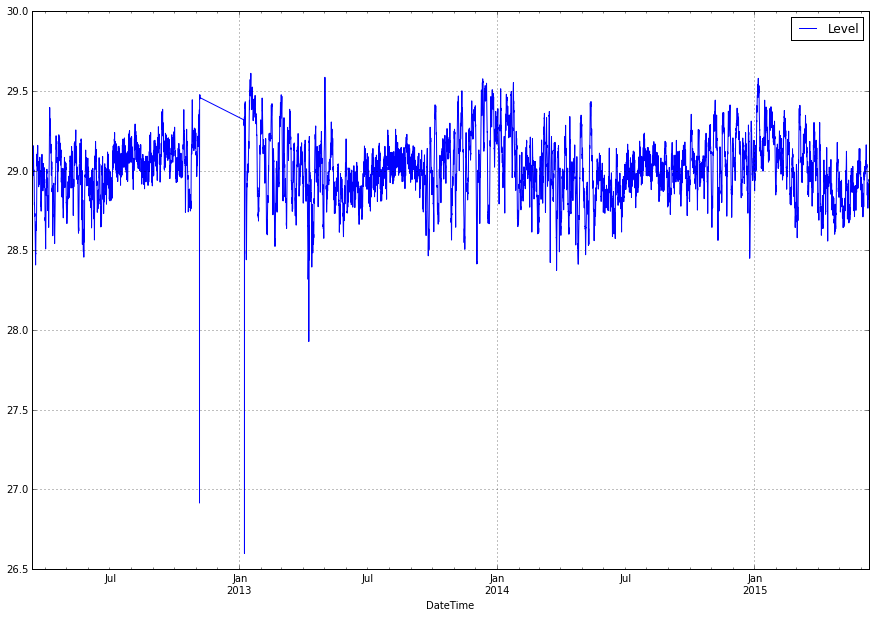

In [11]:
barodata[['Level']].plot()

In [12]:
folder = Drive + ":\\GWP\\Groundwater\\Courthouse_Wash_Transducer_Data"
wellinfo = snake.make_files_table(folder, wellinfo)
wellinfo.tail(n=3)

,date,extensions,full_file_name,siteid,filedups,LoggerTypeID_x,LoggerTypeName,SiteID,Well,WRNum,...,HasTemp,BaroEfficiency,BaroEfficiencyStart,GraphMax,GraphMin,ImagePath,LinkUSGSNWIS,VegType,G_Elev_m,WellID
0,2015_06_12,.xle,chwent 2015_06_12.xle,chwent,True,2,Solinst,101,chwent,1101002M00,...,1,NaN,NaN,NaN,NaN,courthouse wash.jpg,http://nwis.waterdata.usgs.gov/usa/nwis/gwleve...,NaN,1325.758961,138
1,2015_06_12,.xle,chwnav 2015_06_12.xle,chwnav,True,2,Solinst,101,chwnav,1101002M00,...,1,NaN,NaN,NaN,NaN,courthouse wash.jpg,http://nwis.waterdata.usgs.gov/usa/nwis/gwleve...,NaN,1325.758961,139


## Water Level Tranducer Data

### Export and Plot Data

#### Export Manual Data

In [13]:
manual.reset_index(inplace=True)
manual.set_index('WellID',inplace=True)

manual["MeasuredLevel"] = np.nan
manual["Temp"] = np.nan
manual["BaroEfficiencyCorrected"] = np.nan 
manual["DeltaLevel"] = np.nan
manual["DriftCorrection"] = np.nan
manual["MeasuredBy"] = np.nan
manual["Tape"] = 1
manual["DTWBelowGroundSurface"] = np.nan
manual["WaterElevation"] = np.nan
#manualrecent["DTWBelowGroundSurface"] = np.nan
manlist= [int(i) for i in manual.index.tolist()]

print manlist
for i in manlist:
    try:
        manual.loc[i,"DTWBelowCasing"] = manual.loc[i,"MeasuredDTW"]
        manual.loc[i,"DTWBelowGroundSurface"] = manual.loc[i,"MeasuredDTW"] - wellinfo.loc[i,"Offset"]
        manual.loc[i,"WaterElevation"] = wellinfo.loc[i,'GroundElevation'] - manual.loc[i,"DTWBelowGroundSurface"]
    except(KeyError):
        pass

outpath = pathlist[0] + '\\' + pathlist[1] + '\\' + pathlist[2] + '\\' + pathlist[3] + '\\' + pathlist[4] + '\\' + 'Manual' + '.csv'  
manual.to_csv(outpath, index=True, columns= ["DateTime","MeasuredLevel","Temp","BaroEfficiencyCorrected","DeltaLevel",
                                             "MeasuredDTW","DriftCorrection","DTWBelowCasing","DTWBelowGroundSurface",
                                             "WaterElevation","Tape","MeasuredBy"])


[139, 139, 139, 139, 139, 139, 139, 139, 139]


#### Import All Files

In [14]:
pdf_pages = PdfPages(folder+'wells.pdf')
for i in wellinfo.loc[:,'full_file_name']:
    print i
    g = snake.imp_new_well(folder+'\\'+i, wellinfo, manual, barodata)
    glist = g.columns.tolist()
    for j in range(len(glist)):
        if 'pw' in glist[j]:
            h = glist[j]
    y1 = g['WaterElevation'].values
    y2 = g[h].values
    x1 = g['DateTime'].values
    wellname, wellid = snake.getwellid(folder+'\\'+i,wellinfo1)
    ylast = wellinfo[wellinfo['WellID']==wellid]['GroundElevation'].values[0] + wellinfo[wellinfo['WellID']==wellid]['Offset'].values[0] - fcl(manual[manual['WellID']== wellid],max(g.index.to_datetime()))[1]
    yfirst = wellinfo[wellinfo['WellID']==wellid]['GroundElevation'].values[0] + wellinfo[wellinfo['WellID']==wellid]['Offset'].values[0] - fcl(manual[manual['WellID']== wellid],min(g.index.to_datetime()))[1]
    xlast = (fcl(manual[manual['WellID']== wellid],max(g.index.to_datetime()))).name.to_datetime()
    xfirst = (fcl(manual[manual['WellID']== wellid],min(g.index.to_datetime()))).name.to_datetime()
    x4 = [xfirst,xlast]
    y4 = [yfirst,ylast]
    fig, ax1 = plt.subplots()
    ax1.scatter(x4,y4,color='purple')
    ax1.plot(x1,y1,color='blue',label='Water Level Elevation')
    ax1.set_ylabel('Water Level Elevation',color='blue')
    y_formatter = tick.ScalarFormatter(useOffset=False)
    ax1.yaxis.set_major_formatter(y_formatter)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Barometric Pressure (ft)', color='red') 
    ax2.plot(x1,y2,color='red',label='Barometric pressure (ft)')
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc=3)
    
    plt.title('Well: ' + wellname.title() + '  ' + 'Total Drift = ' + str(g['DriftCorrection'][-1]))
    pdf_pages.savefig(fig)
    fig.close()
pdf_pages.close()

chwent 2015_06_12.xle
U:\GWP\Groundwater\Courthouse_Wash_Transducer_Data\chwent 2015_06_12.xle


IndexError: list index out of range

In [22]:
infile = Drive + ':\\GWP\\Groundwater\\Courthouse_Wash_Transducer_Data\\chwnav 2015_06_12.xle'
with open(infile) as fd:
    # parse xml
    obj = xmltodict.parse(fd.read(),encoding="ISO-8859-1")
# navigate through xml to the data
wellrawdata = obj['Body_xle']['Data']['Log']
# convert xml data to pandas dataframe
f = pd.DataFrame(wellrawdata)
# get header names and apply to the pandas dataframe
f[str(obj['Body_xle']['Ch2_data_header']['Identification']).title()] = f['ch2']

tempunit = (obj['Body_xle']['Ch2_data_header']['Unit'])
if tempunit == 'Deg C' or tempunit == u'\N{DEGREE SIGN}' + u'C':
    f[str(obj['Body_xle']['Ch2_data_header']['Identification']).title()] = f['ch2'].convert_objects(convert_numeric=True)
elif tempunit == 'Deg F' or tempunit == u'\N{DEGREE SIGN}' + u'F': 
    f[str(obj['Body_xle']['Ch2_data_header']['Identification']).title()] = f['ch2'].convert_objects(convert_numeric=True)*0.33456

unit = str(obj['Body_xle']['Ch1_data_header']['Unit']).lower()
if unit == "feet" or unit == "ft":
    f[str(obj['Body_xle']['Ch1_data_header']['Identification']).title()] = f['ch1'].convert_objects(convert_numeric=True)
elif unit == "kpa":
    f[str(obj['Body_xle']['Ch1_data_header']['Identification']).title()] = f['ch1'].convert_objects(convert_numeric=True)*0.33456
elif unit == "mbar":
    f[str(obj['Body_xle']['Ch1_data_header']['Identification']).title()] = f['ch1'].convert_objects(convert_numeric=True)*0.0334552565551
elif unit == "psi":
    f[str(obj['Body_xle']['Ch1_data_header']['Identification']).title()] = f['ch1'].convert_objects(convert_numeric=True)*2.306726
elif unit == "m" or unit == "meters":
    f[str(obj['Body_xle']['Ch1_data_header']['Identification']).title()] = f['ch1'].convert_objects(convert_numeric=True)*3.28084
else:
    f[str(obj['Body_xle']['Ch1_data_header']['Identification']).title()] = f['ch1'].convert_objects(convert_numeric=True)
    print "Unknown Units"
# add extension-free file name to dataframe
f['name'] = snake.getfilename(infile)
# combine Date and Time fields into one field
f['DateTime'] = pd.to_datetime(f.apply(lambda x: x['Date'] + ' ' + x['Time'], 1))
f[str(obj['Body_xle']['Ch1_data_header']['Identification']).title()] = f[str(obj['Body_xle']['Ch1_data_header']['Identification']).title()].convert_objects(convert_numeric=True)
f[str(obj['Body_xle']['Ch2_data_header']['Identification']).title()] = f[str(obj['Body_xle']['Ch2_data_header']['Identification']).title()].convert_objects(convert_numeric=True)
f = f.reset_index()
f = f.set_index('DateTime')
f = f.drop(['Date','Time','@id','ch1','ch2','index','ms'],axis=1)

In [23]:
f

,Temperature,Level,name
DateTime,,,
2013-11-13 11:49:21,13.419,29.2942,chwnav 2015_06_12
2013-11-13 12:49:21,15.320,43.4643,chwnav 2015_06_12
2013-11-13 13:49:21,15.317,43.4622,chwnav 2015_06_12
2013-11-13 14:49:21,15.318,43.4616,chwnav 2015_06_12
2013-11-13 15:49:21,15.317,43.4600,chwnav 2015_06_12
2013-11-13 16:49:21,15.317,43.4430,chwnav 2015_06_12
2013-11-13 17:49:21,15.318,43.4271,chwnav 2015_06_12
2013-11-13 18:49:21,15.317,43.4072,chwnav 2015_06_12
2013-11-13 19:49:21,15.318,43.3853,chwnav 2015_06_12


#### Import One File

In [42]:
import snake
inputfile = r"U:\GWP\Groundwater\Courthouse_Wash_Transducer_Data\chwnav 2015_06_12.xle"

g = snake.imp_new_well(inputfile, wellinfo, manual, barodata)
glist = g.columns.tolist()
for j in range(len(glist)):
        if 'pw' in glist[j]:
            h = glist[j]
y1 = g['WaterElevation'].values
y2 = g[h].values
x1 = g['DateTime'].values

wellname, wellid = getwellid(inputfile)
ylast = wellinfo[wellinfo['WellID']==wellid]['GroundElevation'].values[0] + wellinfo[wellinfo['WellID']==wellid]['Offset'].values[0] - fcl(manual[manual['WellID']== wellid],max(g.index.to_datetime()))[1]
yfirst = wellinfo[wellinfo['WellID']==wellid]['GroundElevation'].values[0] + wellinfo[wellinfo['WellID']==wellid]['Offset'].values[0] - fcl(manual[manual['WellID']== wellid],min(g.index.to_datetime()))[1]
xlast = (fcl(manual[manual['WellID']== wellid],max(g.index.to_datetime()))).name.to_datetime()
xfirst = (fcl(manual[manual['WellID']== wellid],min(g.index.to_datetime()))).name.to_datetime()
x4 = [xfirst,xlast]
y4 = [yfirst,ylast]

fig, ax1 = plt.subplots()
ax1.scatter(x4,y4,color='purple')
ax1.plot(x1,y1,color='red')
y_formatter = tick.ScalarFormatter(useOffset=False)
ax1.yaxis.set_major_formatter(y_formatter)
ax2 = ax1.twinx()
ax2.plot(x1,y2,color='blue')
plt.title(getfilename(inputfile)+'  '+str(g['DriftCorrection'][-1]))
plt.show()

U:\GWP\Groundwater\Courthouse_Wash_Transducer_Data\chwnav 2015_06_12.xle


IndexError: list index out of range

In [50]:
wellname, wellid = snake.getwellid(infile,wellinfo) #see custom getwellid function
f = snake.new_xle_imp(infile)
bse = int(f.index.to_datetime().minute[0])
try:
    bp = wellinfo[wellinfo['Well']==wellname]['BE barologger']
    b = snake.hourly_resample(barodata[bp], bse)
    b = b.to_frame()
except (KeyError,NameError):
    bp = u'Level' 
    b = snake.hourly_resample(barodata['Level'], bse)
    b = b.to_frame()
    b['bp'] = b['Level']
    b.drop(['Level'],inplace=True,axis=1)
f = snake.hourly_resample(f,bse)
print f
g = pd.merge(f,b,left_index=True,right_index=True,how='inner',sort=True)
print g
g['MeasuredLevel'] = g['Level']         

# Remove first and/or last measurements if the transducer was out of the water
## Examine First Value
firstupper = np.mean(g['MeasuredLevel'].diff()[2:31]) + np.std(g['MeasuredLevel'].diff()[2:31])*2.2 # 2.2 std dev.
firstlower = np.mean(g['MeasuredLevel'].diff()[2:31]) - np.std(g['MeasuredLevel'].diff()[2:31])*2.2 # 2.2 std dev.
firstlev = g['MeasuredLevel'].diff()[1:2].values[0] # difference of first two values
## Examine Last Value
lastupper = np.mean(g['MeasuredLevel'].diff()[-31:-2]) + np.std(g['MeasuredLevel'].diff()[-31:-2])*2.2 # 2.2 std dev.
lastlower = np.mean(g['MeasuredLevel'].diff()[-31:-2]) - np.std(g['MeasuredLevel'].diff()[-31:-2])*2.2 # 2.2 std dev.
lastlev = g['MeasuredLevel'].diff()[-2:-1].values[0] # difference of last two values
## drop first value if 2.2 std dev beyond first 30 values
if np.abs(firstlev) > 0.1:
    if firstlev > firstupper or firstlev < firstlower:
        g.drop(g.index[0],inplace=True)
## drop last value if 2.2 std dev beyond last 30 values
if np.abs(lastlev) > 0.1:
    if lastlev > lastupper or lastlev < lastlower:
        g.drop(g.index[-1],inplace=True)

glist = f.columns.tolist()
if 'Temperature' in glist:
    g['Temp'] = g['Temperature']
    g.drop(['Temperature'],inplace=True,axis=1)
elif 'Temp' in glist:
    pass
# Get Baro Efficiency
be = wellinfo[wellinfo['WellID']==wellid]['BaroEfficiency']
be = be.iloc[0]

# Barometric Efficiency Correction
g['BaroEfficiencyCorrected'] = g['MeasuredLevel'] - g[bp] + be*g[bp]

                     Temperature      Level               name
DateTime                                                      
2014-05-09 11:57:00       27.654  28.852363  chwent 2015_06_12
2014-05-09 12:57:00       15.225  52.778217  chwent 2015_06_12
2014-05-09 13:57:00       17.255  53.972115  chwent 2015_06_12
2014-05-09 14:57:00       19.618  54.789700  chwent 2015_06_12
2014-05-09 15:57:00       21.672  55.193243  chwent 2015_06_12
2014-05-09 16:57:00       22.480  55.470802  chwent 2015_06_12
2014-05-09 17:57:00       22.616  55.720146  chwent 2015_06_12
2014-05-09 18:57:00       21.660  55.898952  chwent 2015_06_12
2014-05-09 19:57:00       20.740  56.026249  chwent 2015_06_12
2014-05-09 20:57:00       19.754  56.158466  chwent 2015_06_12
2014-05-09 21:57:00       18.630  56.229989  chwent 2015_06_12
2014-05-09 22:57:00       17.354  56.331695  chwent 2015_06_12
2014-05-09 23:57:00       16.337  56.441603  chwent 2015_06_12
2014-05-10 00:57:00       15.613  56.529857  chwent 201

### Combine Output

In [ ]:
q = {}

for i in wellinfo.loc[:,'full_file_name']:
    wellname, wellid = getwellid(folder+'\\'+i)
    q[wellname] = imp_new_well(folder+'\\'+i, wellinfo, manual)


In [ ]:
q.names.to_list()

In [ ]:
alldf = ag13a.append(q)
outpath = pathlist[0] + '\\' + pathlist[1] + '\\' + pathlist[2] + '\\' + pathlist[3] + '\\' + pathlist[4] + '\\' + 'all' + '.csv'
alldf.to_csv(outpath, index=False, columns= ["WellID","DateTime","MeasuredLevel","Temp","BaroEfficiencyCorrected","DeltaLevel",
                                             "MeasuredDTW","DriftCorrection","DTWBelowCasing","DTWBelowGroundSurface",
                                             "WaterElevation","Tape","MeasuredBy"])

In [ ]:
dailyavgfiles = r"U:\GWP\Snake Valley Water\Transducer Data\Individual Sites\Daily Averages"

In [ ]:
well = r"U:\GWP\Snake Valley Water\Transducer Data\Individual Sites\Daily Averages\ag13b.xlsx"

In [ ]:
hourly = pd.read_excel(well,'input',parse_dates=True,index_col='DateTime')
hwl = hourly["WaterElevation"].resample('D',how='mean')
hwl = hwl.interpolate(how='Time')
hwl.plot()